In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, chi2

In [ ]:
sns.set(rc={'figure.figsize': (13, 9)})
sns.set(font_scale=1.7)

In [ ]:
STD = 2.0
GAMMA = 0.95
RETR = 100

In [ ]:
lens = []
ns = np.arange(10, 3000, 50)
for n in ns:
    tries = []
    for _ in range(RETR):
        X = np.random.normal(0, STD, n)
        SX2 = (X ** 2).sum()
        l = SX2 / chi2.ppf((1 + GAMMA) / 2, n)
        r = SX2 / chi2.ppf((1 - GAMMA) / 2, n)
        tries.append(r - l)
    lens.append(np.mean(tries))

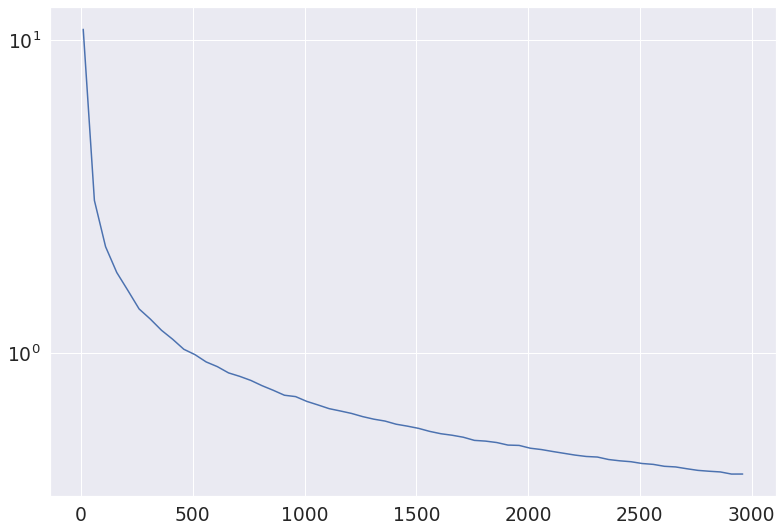

In [ ]:
sns.lineplot(x=ns, y=lens)
plt.yscale('log')

In [ ]:
lens = []
ns = np.arange(10, 3000, 50)
for n in ns:
    tries = []
    for _ in range(RETR):
        X = np.random.normal(0, STD, n)
        NXM2 = n * X.mean() ** 2
        l = NXM2 / norm.ppf((3 + GAMMA) / 4) ** 2
        r = NXM2 / norm.ppf((3 - GAMMA) / 4) ** 2
        tries.append(r - l)
    lens.append(np.mean(tries))

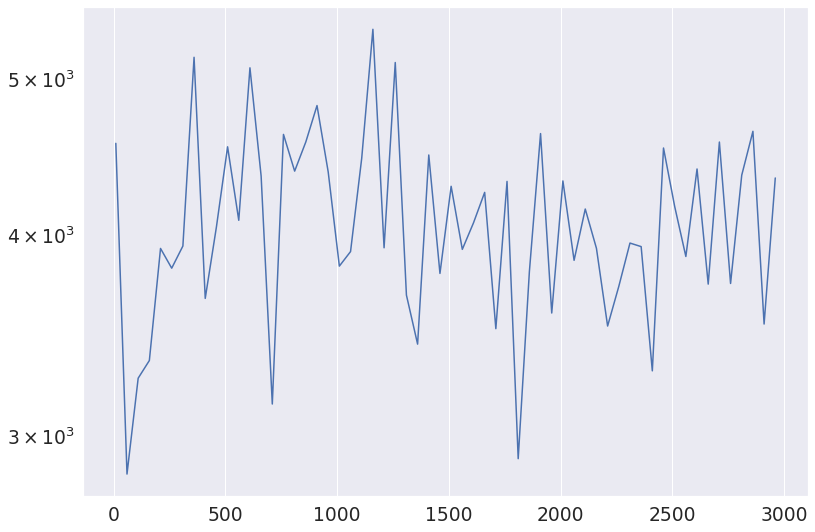

In [ ]:
sns.lineplot(x=ns, y=lens)
plt.yscale('log')

Очевидно, что первая оценка намного более полезна, чем вторая, у которой длина интервала на $3$ порядка больше цистинного параметра